<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85_pandas/eda_gpt(240906).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#openAPI with EDA
#--> 코드 &패키지들이 자주 변경이 될거 갖고 오늘 돌아간 코드가 내일은 안돌아 갈수 있음

In [1]:
!pip install langchain
!pip install openai
!pip install langchain-experimental
!pip install --upgrade pip
!pip install "langserve[all]"
!pip install langchain-cli
!pip install -U langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ------------- 아래는 위에서 패키지를 설치해야 되는 것들....
from getpass import getpass
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import OpenAI

In [3]:
# ==> 필요에 따라서 직접 본인 API신청하고
#     key값을 받은 것들을 사용하면 된다

In [5]:
df = pd.read_csv("/content/titanic_train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 참고) GPT에 직접 물어보면서 진행할 수도 있고,,
#       여기서는 내가 사용하는 DF에 바로 붙여서 물어보고 사용하려고 하려고 함
#       ==> 코드상 바로 붙여서 사용해야 하니 API

In [7]:
# --> 패키지하고, 연동 되어서 자주 이 쪽이 변경이 된다;;
agent = create_pandas_dataframe_agent(OpenAI(temperature=0, openai_api_key=openai_api_key),df, verbose=True,allow_dangerous_code=True)
openai = OpenAI(temperature=0.0, openai_api_key=openai_api_key)

In [8]:
result = agent("how many records are there?")

<ipython-input-8-fbf871090e5b>:1: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  result = agent("how many records are there?")




> Entering new AgentExecutor chain...
Thought: I need to count the number of rows in the dataframe
Action: python_repl_ast
Action Input: len(df)891891 is the number of rows in the dataframe
Final Answer: 891

> Finished chain.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
q_txt = "Give me rows and columns"
result = agent(q_txt)



> Entering new AgentExecutor chain...
Thought: I need to use the shape attribute of the dataframe to get the number of rows and columns
Action: python_repl_ast
Action Input: df.shape(891, 12)891 rows and 12 columns
Final Answer: 891 rows and 12 columns

> Finished chain.




> Entering new AgentExecutor chain...
Thought: I need to group the data by gender and then count the number of survivals in each group.
Action: python_repl_ast
Action Input: df.groupby('Sex')['Survived'].sum()Sex
female    233
male      109
Name: Survived, dtype: int64I now know the number of survivals by gender, but I need to plot it.
Action: python_repl_ast
Action Input: df.groupby('Sex')['Survived'].sum().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)I now have a bar plot, but I need to add labels and a title.
Action: python_repl_ast
Action Input: ax = df.groupby('Sex')['Survived'].sum().plot(kind='bar')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Survivals')
ax.set_title('Survivals by Gender')Text(0.5, 1.0, 'Survivals by Gender') I now have a bar plot with labels and a title.
Final Answer: The final answer is a bar plot showing the number of survivals by gender.

> Finished chain.


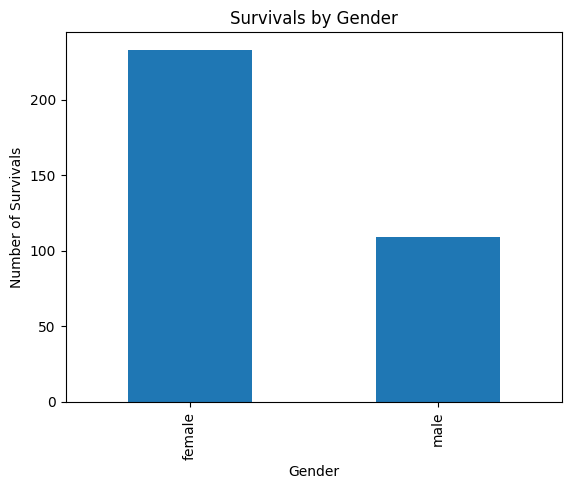

In [11]:
q_txt = "Draw a bar plot to show number of survivals by gender"
result = agent(q_txt)



> Entering new AgentExecutor chain...
Thought: I need to group the data by Pclass and Sex, and then calculate the survival rate for each group.
Action: python_repl_ast
Action Input: df.groupby(['Pclass', 'Sex'])['Survived'].mean()Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64I now have the survival rates for each group, but I need to plot them.
Action: python_repl_ast
Action Input: df.groupby(['Pclass', 'Sex'])['Survived'].mean().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)I now have a bar graph showing the survival rates for each group, but I need to add labels and a title.
Action: python_repl_ast
Action Input: ax = df.groupby(['Pclass', 'Sex'])['Survived'].mean().plot(kind='bar')
ax.set_xlabel("Passenger Class and Sex")
ax.set_ylabel("Survival Rate")
ax.set_title("Survival Rate by Passenger Class and Sex")Text(0.5, 1.0, 'Sur

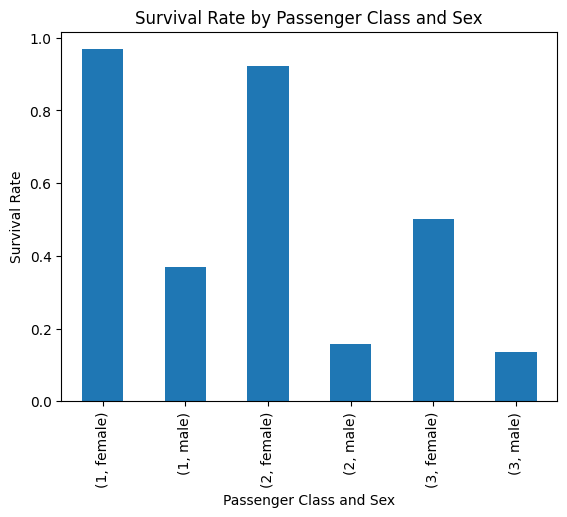

In [12]:
q_txt = "객실 등급에 따라서 성별의 차이에 대한 생존율에 대한 그래프를 그려주세요 "
result = agent(q_txt)

In [ ]:
#내가 이 그래프와 코드를 모르고 시키기만 하면 요게 정확히 나온지 판단 할수가 없다.
#그러니 꼭 안 다음에 시키고 또 단점이 구체적으로 지시 하지 않으면 뻔한것만 나오게 된다.

In [13]:
q_txt = "생존율과 관련된 제일 중요한 변수가 무엇이고 왜 그렇게 생각하니?"
result = agent(q_txt)



> Entering new AgentExecutor chain...
Thought: 생존율과 관련된 변수를 찾기 위해 생각해보자.
Action: python_repl_ast
Action Input: df.corr()ValueError: could not convert string to float: 'Braund, Mr. Owen Harris' 'Name' 변수는 생존율과 관련이 없는 것 같다.
Action: python_repl_ast
Action Input: df.drop('Name', axis=1).corr()ValueError: could not convert string to float: 'male' 'Sex' 변수도 생존율과 관련이 없는 것 같다.
Action: python_repl_ast
Action Input: df.drop(['Name', 'Sex'], axis=1).corr()ValueError: could not convert string to float: 'A/5 21171' 'Ticket' 변수도 생존율과 관련이 없는 것 같다.
Action: python_repl_ast
Action Input: df.drop(['Name', 'Sex', 'Ticket'], axis=1).corr()ValueError: could not convert string to float: 'C85' 'Cabin' 변수도 생존율과 관련이 없는 것 같다.
Action: python_repl_ast
Action Input: df.drop(['Name', 'Sex', 'Ticket', 'Cabin'], axis=1).corr()ValueError: could not convert string to float: 'S' 'Embarked' 변수도 생존율과 관련이 없는 것 같다.
Action: python_repl_ast
Action Input: df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).corr() 



> Entering new AgentExecutor chain...
Thought: I should use descriptive statistics and visualizations to explore the dataset.
Action: python_repl_ast
Action Input: df.describe()       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400 

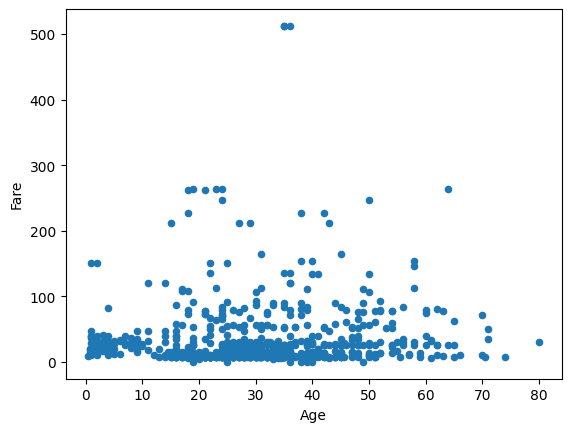

In [14]:
q_txt = "이 데이터셋에 대한 데이터탐색을 진행해줘.최대한 여러가지 측면으로 해주세요"
result = agent(q_txt)

In [15]:
q_txt = "객실등급에 있어서 생존유무에 따른 차이가 있는지 확인해주세요"
result = agent(q_txt)



> Entering new AgentExecutor chain...
Thought: I need to group the data by Pclass and then calculate the mean of the Survived column for each group.
Action: python_repl_ast
Action Input: df.groupby('Pclass')['Survived'].mean()Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 I now know the final answer
Final Answer: There is a difference in survival rate based on passenger class. Passengers in first class had a higher survival rate compared to those in second and third class.

> Finished chain.




> Entering new AgentExecutor chain...
Thought: I need to group the dataframe by Pclass and then count the number of Survived and not Survived for each group.
Action: python_repl_ast
Action Input: df.groupby('Pclass')['Survived'].value_counts().unstack()Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119I need to plot this data using a bar graph.
Action: python_repl_ast
Action Input: df.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar')Axes(0.125,0.11;0.775x0.77) I need to add labels and a title to the graph.
Action: python_repl_ast
Action Input: df.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar', title='Survival by Pclass', xlabel='Pclass', ylabel='Number of Passengers')Axes(0.125,0.11;0.775x0.77) I now know the final answer
Final Answer: A bar graph showing the number of passengers who survived and did not survive for each Pclass.

> Finished chain.


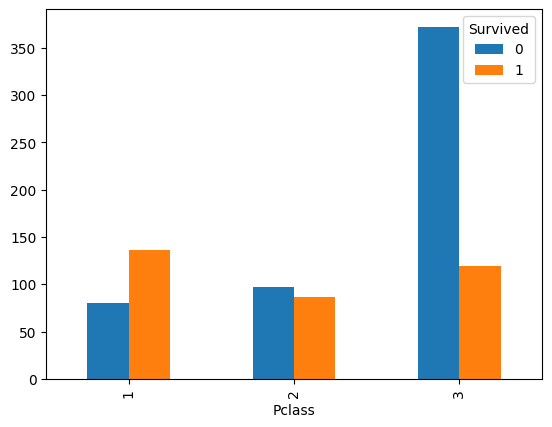

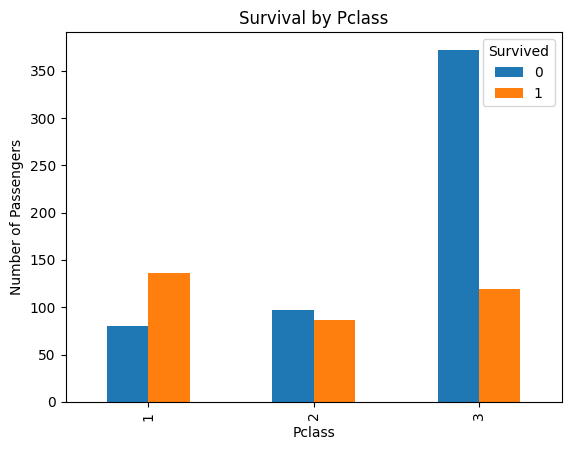

In [16]:
q_txt = "위의 그래프에서 객실등급별로 생존한 사람 수, 사망한 사람 수 그래프를 그려주세요"
result = agent(q_txt)

In [ ]:
# ===> 최근에는 코드적인 부분에 있어서 GPT같은 것들을 이용하면 효율성이 높을 수 있음
# ===> 아직, 한글이나 질문에 여전히 민감한 부분이 있다
# ===> 본인이 기본적인 사항을 알고 계셔야,,던주는 코드도 파악하면서 어떤식으로 처리를 했는지 보고, 수용할지/ 다시 할지 스스로 판단해야 함!!!


# ***** DL/ML/EDA GPT 유용함!!!!
# DL : GPT / Google / AWS ==> 인공지능 API를 활용해서 데이터셋 구축
# 구축하고자 하는 셋 : 이미지 -- 설명에 대한 text
#                                (이러 이러한 항목들을 중심으로 정리해서 기술)
# ==> 전에 기수 친구들로 프로젝트할 떄 상당히 이용함 ML/DL
# *** 본인 목적에 맞는 정확한 가이드를 통해서 진행을 해야 한다

# 참고) 단순 기술적인 부분은 허들이 점점 낮아질 듯 하다.
# ===> 이것들을 어디에 어떻게 쓸지에 대한 아이디어/기획/활용능력
# 단순 기술만이 아니라 기획/활용에 대한 고민을 늘 해야 한다.